# Numerical Calculus

Throughout this section and the next ones, we shall cover the topic of numerical calculus. Calculus has been identified since ancient times as a powerful toolkit for analysing and handling geometrical problems. Since differential calculus was developed by Newton and Leibniz (in its actual notation), many different applications have been found, at the point that most of the current science is founded on it (e.g. differential and integral equations). Due to the ever increasing complexity of analytical expressions used in physics and astronomy, their usage becomes more and more impractical, and numerical approaches are more than necessary when one wants to go deeper. This issue has been identified since long ago and many numerical techniques have been developed. We shall cover only the most basic schemes, but also providing a basis for more formal approaches.

- - -
- [Numerical Differentiation](#Numerical-Differentiation) 
    - [Example 1](#Example-1)
    - [(n+1)-point formula](#n+1-point-formula)
    - [Endpoint formulas](#Endpoint-formulas)
    - [Midpoint formulas](#Midpoint-formulas)
- [Numerical Integration](#Numerical-Integration)
    - [Numerical quadrature](#Numerical-quadrature)
    - [Trapezoidal rule](#Trapezoidal-rule)
    - [Simpson's rule](#Simpson's-rule)
- [Composite Numerical Integration](#Composite-Numerical-Integration)
    - [Composite trapezoidal rule](#Composite-trapezoidal-rule)
    - [Composite Simpson's rule](#Composite-Simpson's-rule)
- [Adaptive Quadrature Methods](#Adaptive-Quadrature-Methods)
    - [Simpson's adaptive quadrature](#Simpson's-adaptive-quadrature)
    - [Steps Simpson's adaptive quadrature](#Steps-Simpson's-adaptive-quadrature)
- [Improper Integrals](#Improper-Integrals)
    - [Left endpoint singularity](#Left-endpoint-singularity)
    - [Right endpoint singularity](#Right-endpoint-singularity)
    - [Infinite singularity](#Infinite-singularity)
    
- - -

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
#Interpolation add-on
import scipy.interpolate as interp

Populating the interactive namespace from numpy and matplotlib


- - - 

# Numerical Differentiation

According to the formal definition of differentiation, given a function $f(x)$ such that $f(x)\in C^1[a,b]$, the first order derivative is given by

$$\frac{d}{dx}f(x) = f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

However, when $f(x)$ exhibits a complex form or is a numerical function (only a discrete set of points are known), this expression becomes unfeasible. In spite of this, this formula gives us a very first rough way to calculate numerical derivatives by taking a finite interval $h$, i.e.

$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

where the function must be known at least in $x_0$ and $x_1 = x_0+h$, and $h$ should be small enough.

## Example 1

Evaluate the first derivative of the next function using the previous numerical scheme at the point $x_0=2.0$ and using $h=0.5,\ 0.1,\  0.05$

$f(x) = \sqrt{1+\cos^2(x)}$

Compare with the real function and plot the tangent line using the found values of the slope.

In [7]:
import numpy as np

In [8]:
from scipy.misc import derivative

In [83]:
derivative?

It is used as:
```python
 derivative(func, x0, dx=1.0, n=1, args=(), order=3)
```
__Parameters__<br/>
`func` : function ->
    Input function.<br/>
`x0` : float -> 
    The point at which `n`-th derivative is found.<br/>
`dx` : float, optional -> 
    Spacing.<br/>
`n` : int, optional -> 
    Order of the derivative. Default is 1.<br/>
`args` : tuple, optional -> 
    Arguments<br/>
`order` : int, optional -> 
    Number of points to use, must be odd.<br/>


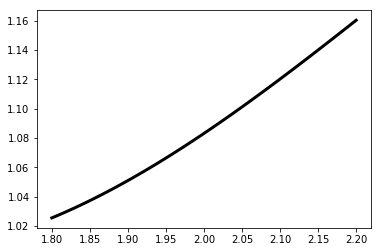

In [9]:
def function(x):
    return np.sqrt( 1+np.cos(x)**2 )

#X value
x0 = 2
xmin = 1.8
xmax = 2.2

X = np.linspace( xmin, xmax, 100 )

plt.plot( X, np.sqrt( 1+np.cos(X)**2 ), color="black", label="function", linewidth=3, zorder=10 )

We now check for the impact of the change of the spacing `dx`

In [10]:
derivative(function,2,dx=0.5)

0.27884081567829266

In [11]:
derivative(function,2,dx=0.1)

0.3462499420237386

In [12]:
derivative(function,2,dx=0.05)

0.34857854916349629

In [13]:
derivative(function,2,dx=1E-3)

0.34935758881293744

In [14]:
derivative(function,2,dx=1E-6)

0.34935790094170471

In [24]:
derivate(function,2,dx=1E-6)

0.34935790094170471

###  Implementation of the derivate of the function inside a full range
We now generalize the `derivative` function to allow the evaluation of the derivate in a full range of values. It will be designed like the evaluation in just one point alse be possible, such that can be used as a full replacement of `derivative` function.

First we introduce the `try` and `except` python progamming sctructure, wich is used to bypass one python error. For example a zero dimension array has not a shape attribute, so that the following error is generated:

In [84]:
nn=np.array(3).shape[0]

IndexError: tuple index out of range

To bypass that error we use the following code:

In [42]:
try: 
    nn=np.array(3).shape[0]
except IndexError:
    nn=-1

so that `nn` takes the values assigned in the `except` part:

In [43]:
nn

-1

A second ingridient is the `append` method of a Python list. It update the elements of the list without update explicitly the variable with some equal reasignment.

In [46]:
y=[]

In [47]:
y.append(2)

In [48]:
y

[2]

In [49]:
y.append(5)

In [50]:
y

[2, 5]

Let see now the implementation of the `derivate` function as full replacement of the `derivative` function:

In [51]:
def derivate(func,x0,dx=1,n=1,args=(),order=3):
    '''
    Same as scipy derivative but returbs the function if
    x0 is an array instead of a lota
    '''
    from scipy.misc import derivative
    try:
        nn=np.array(x0).shape[0]
    except IndexError:
        nn=-1
    if nn>-1:
        y=[]
        for xx in x0:
             y.append(derivative(func,xx,dx=dx,n=n,args=args,order=order))
                
        y=np.array(y)   
    else:
        y=derivative(func,x0,dx=dx,n=n,args=args,order=order)
        
    return y

Let us check the implementation with the previous function

In [52]:
func=lambda x: np.sqrt( 1+np.cos(x)**2 )

but now evaluated for a list of values

In [53]:
x=[1.8,2,2.2]
funcp=derivate(func,x,dx=1E-3)
funcp

array([ 0.21576117,  0.34935759,  0.41006125])

For the prevous `X` array:

In [54]:
X.shape

(100,)

We have:

In [55]:
derivate(func,X,dx=1E-3).shape

(100,)

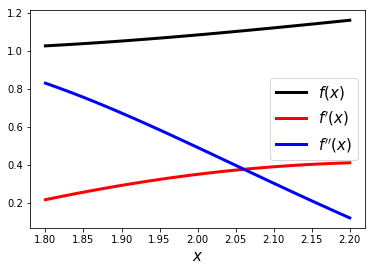

In [94]:
xmin = 1.8
xmax = 2.2

X = np.linspace( xmin, xmax, 100 )

plt.plot( X, np.sqrt( 1+np.cos(X)**2 ), color="black", label="$f(x)$", linewidth=3)
plt.plot( X, derivate(func,X,dx=1E-3), color="red", label="$f'(x)$", linewidth=3)
plt.plot( X, derivate(func,X,dx=1E-3,n=2), color="blue", label="$f''(x)$", linewidth=3)
plt.legend(loc='best',fontsize=15)
plt.xlabel('$x$',size=15)

Finally we check the function $f(x)=\cos x$ in the range $[0,2\pi]$

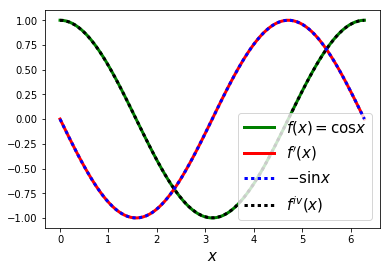

In [82]:
xmin = 0
xmax = 2*np.pi

X = np.linspace( xmin, xmax, 100 )

plt.plot( X, np.cos(X) , "g-", label="$f(x)=\cos x$", linewidth=3)
plt.plot( X, derivate(lambda x:np.cos(x),X,dx=1E-3), color="red", label="$f'(x)$", linewidth=3)
plt.plot( X, -np.sin(X) , 'b:', label="$-\sin x$", linewidth=3, zorder=10 )
plt.plot( X, derivate(lambda x:np.cos(x),X,dx=1E-3,n=4,order=5), 'k:', label="$f^{iv}(x)$", linewidth=3)
plt.legend(loc='best',fontsize=15)
plt.xlabel('$x$',size=15)

### One implementation of `derivative` algorithm

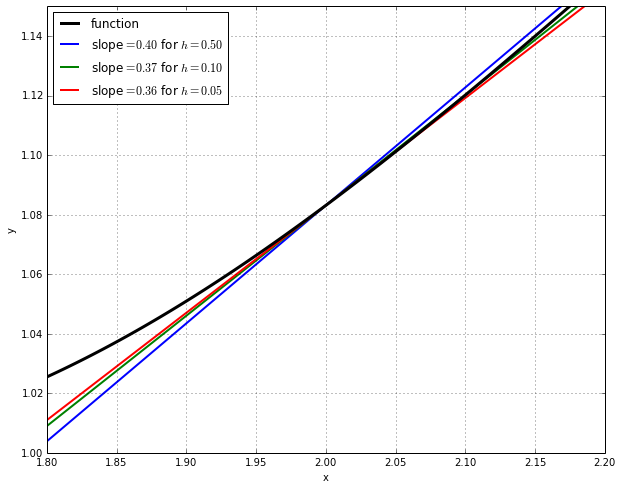

In [5]:
#Function to evaluate
def function(x):
    return np.sqrt( 1+np.cos(x)**2 )

#X value
x0 = 2
xmin = 1.8
xmax = 2.2
#h step
hs = [0.5,0.1,0.05]

#Calculating derivatives
dfs = []
for h in hs:
    dfs.append( (function(x0+h)-function(x0))/h )
    
#Plotting
plt.figure( figsize=(10,8) )
#X array
X = np.linspace( xmin, xmax, 100 )
Y = function(X)
plt.plot( X, Y, color="black", label="function", linewidth=3, zorder=10 )
#Slopes
Xslp = [1,x0,3]
Yslp = [0,0,0]
for df, h in zip(dfs, hs):
    #First point
    Yslp[0] = function(x0)+df*(Xslp[0]-Xslp[1])
    #Second point
    Yslp[1] = function(x0)
    #Third point
    Yslp[2] = function(x0)+df*(Xslp[2]-Xslp[1])
    #Plotting this slope
    plt.plot( Xslp, Yslp, linewidth = 2, label="slope$=%1.2f$ for $h=%1.2f$"%(df,h) )

#Format
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.xlim( xmin, xmax )
plt.ylim( 1, 1.15 )
plt.legend( loc = "upper left" )

## n+1-point formula

A generalization of the previous formula is given by the (n+1)-point formula, where first-order derivatives are calculated using more than one point, what makes it a much better approximation for many problems. it is controled by the `order` option of the `derivative` function of `scipy.misc`

**Theorem**

For a function $f(x)$ such that $f(x)\in C^{n+1}[a,b]$, the next expression is always satisfied

$$f(x) = P(x) + \frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\cdots(x-x_n)$$

where $\{x_i\}_i$ is a set of point where the function is mapped, $\xi(x)$ is some function of $x$ such that $\xi\in[a,b]$, and $P(x)$ is the associated Lagrange interpolant polynomial.

As $n$ becomes higher, the approximation should be better as the error term becomes neglectable.

Taking the previous expression, and differenciating, we obtain

$$f(x) = \sum_{k=0}^n f(x_k)L_{n,k}(x) + \frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi(x))$$

$$f'(x_j) = \sum_{k=0}^n f(x_k)L'_{n,k}(x_j) + \frac{f^{(n+1)}(\xi(x_j))}{(n+1)!} \prod_{k=0,k\neq j}^{n}(x_j-x_k)$$

where $L_{n,k}$ is the $k$-th Lagrange basis functions for $n$ points, $L'_{n,k}$ is its first derivative.

Note that the last expressions is evaluated in $x_j$ rather than a general $x$ value, the cause of this is because this expression is not longer valid for another value not within the set $\{x_i\}_i$, however this is not an inconvenient when handling real applications.

This formula constitutes the **(n+1)-point approximation** and it comprises a generalization of almost all the existing schemes to differentiate numerically. Next, we shall derive some very used formulas.

For example, the form that takes this derivative polynomial for 3 points $(x_i,y_i)$ is the following

$$f'(x_j) = f(x_0)\left[ \frac{2x_j-x_1-x_2}{(x_0-x_1)(x_0-x_2)}\right] + 
f(x_1)\left[ \frac{2x_j-x_0-x_2}{(x_1-x_0)(x_1-x_2)}\right] +
f(x_2)\left[ \frac{2x_j-x_0-x_1}{(x_2-x_0)(x_2-x_1)}\right] $$ 
$$\hspace{2cm} + \frac{1}{6} f^{(3)}(\epsilon_j) \prod_{k=0,k\neq j}^{n}(x_j-x_k)$$

## Endpoint formulas

Endpoint formulas are based on evaluating the derivative at the first of a set of points, i.e., if we want to evaluate $f'(x)$ at $x_i$, we then need $(x_i$, $x_{i+1}=x_i+h$, $x_{i+2}=x_i+2h$, $\cdots)$. For the sake of simplicity, it is usually assumed that the set $\{x_i\}_i$ is equally spaced such that $x_k = x_0+k\cdot h$.

**Three-point Endpoint Formula**

$$f'(x_i) = \frac{1}{2h}[-3f(x_i)+4f(x_i+h)-f(x_i+2h)] + \frac{h^2}{3}f^{(3)}(\xi)$$

with $\xi\in[x_i,x_i+2h]$

**Five-point Endpoint Formula**

$$f'(x_i) = \frac{1}{12h}[-25f(x_i)+48f(x_i+h)-36f(x_i+2h)+16f(x_i+3h)-3f(x_i+4h)] + \frac{h^4}{5}f^{(5)}(\xi)$$

with $\xi\in[x_i,x_i+4h]$


Endpoint formulas are especially useful near to the end of a set of points, where no further points exist.

## Midpoint formulas

On the other hand, Midpoint formulas are based on evaluating the derivative at the middle of a set of points, i.e., if we want to evaluate $f'(x)$ at $x_i$, we then need $(\cdots$, $x_{i-2} = x_i - 2h$, $x_{i-1} = x_i - h$, $x_i$, $x_{i+1}=x_i+h$, $x_{i+2}=x_i+2h$, $\cdots)$.

**Three-point Midpoint Formula**

$$f'(x_i) = \frac{1}{2h}[f(x_i+h)-f(x_i-h)] + \frac{h^2}{6}f^{(3)}(\xi)$$

with $\xi\in[x_i-h,x_i+h]$

**Five-point Midpoint Formula**

$$f'(x_i) = \frac{1}{12h}[f(x_i-2h)-8f(x_i-h)+8f(x_i+h)-f(x_i+2h)] + \frac{h^4}{30}f^{(5)}(\xi)$$

with $\xi\in[x_i-2h,x_i+2h]$


As Midpoint formulas required one iteration less than Endpoint ones, they are more often used for numerical applications. Furthermore, the round-off error is smaller as well. However, near to the end of a set of points, they are no longer useful as no further points exists, and Endpoint formulas are preferable.

### Example: Heat transfer in a 1D bar 

Fourier's Law of thermal conduction describes the diffusion of heat. Situations in which there are gradients of heat, a flux that tends to homogenise the temperature arises as a consequence of collisions of particles within a body. The Fourier's Law is giving by 

$$ q = -k\nabla T = -k\left( \frac{dT}{dx}\hat{i} + \frac{dT}{dy}\hat{j} + \frac{dT}{dz}\hat{k}\right)$$

where T is the temperature, $\nabla T$ its gradient and k is the material's conductivity. In the next example it is shown the magnitud of the heat flux in a 1D bar(wire).

In [95]:
def Temp(x):
    return x**3 + 3*x-1

In [98]:
Xn = np.linspace(0,10,100)
derivate(Temp,Xn)

array([   4.        ,    4.03060912,    4.12243649,    4.27548209,
          4.48974594,    4.76522804,    5.10192837,    5.49984695,
          5.95898378,    6.47933884,    7.06091215,    7.7037037 ,
          8.4077135 ,    9.17294154,    9.99938782,   10.88705234,
         11.83593511,   12.84603612,   13.91735537,   15.04989287,
         16.24364861,   17.49862259,   18.81481481,   20.19222528,
         21.63085399,   23.13070095,   24.69176615,   26.31404959,
         27.99755127,   29.7422712 ,   31.54820937,   33.41536578,
         35.34374043,   37.33333333,   39.38414448,   41.49617386,
         43.66942149,   45.90388736,   48.19957147,   50.55647383,
         52.97459443,   55.45393327,   57.99449036,   60.59626569,
         63.25925926,   65.98347107,   68.76890113,   71.61554943,
         74.52341598,   77.49250077,   80.5228038 ,   83.61432507,
         86.76706459,   89.98102234,   93.25619835,   96.59259259,
         99.99020508,  103.44903581,  106.96908479,  110.55035

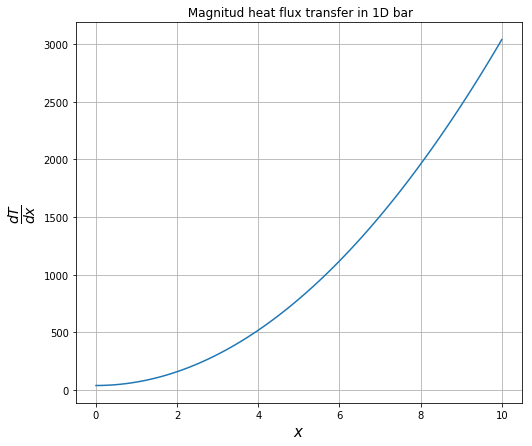

In [105]:
#Temperature profile 
def Temp(x):
    return x**3 + 3*x-1

# Points where function is known
Xn = np.linspace(0,10,100)

plt.figure( figsize=(8,7) )
plt.plot(Xn,derivate(Temp,Xn)*10)

plt.grid()
plt.xlabel( "$x$",fontsize =15 )
plt.ylabel( r"$\frac{dT}{dx}$",fontsize =20 )
plt.title( " Magnitud heat flux transfer in 1D bar" )

Custom implementation

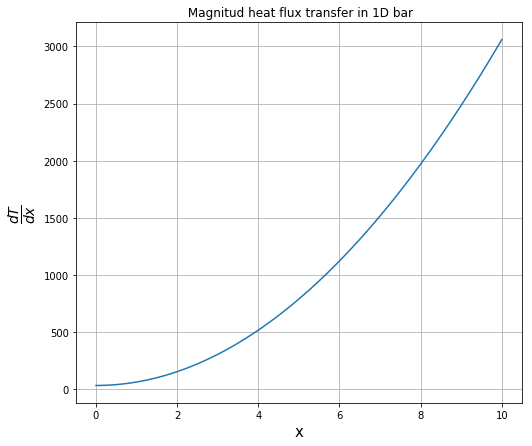

In [106]:
#Temperature profile 
def Temp(x):
    return x**3 + 3*x-1

#Derivative three end point 

def TEP( Yn,i, h=0.01,right=0 ):
    suma = -3*Yn[i]+4*Yn[i+(-1)**right*1]-Yn[i+(-1)**right*2]
    return suma/(2*h*(-1)**right)

#Derivative mid point 
def TMP( Ynh,Ynmh, h = 0.01 ):    
    return (Ynh-Ynmh)/(2*h)

# Points where function is known
Xn = np.linspace(0,10,100)
Tn = Temp(Xn)
#Magnitude of heat flux array
Q = np.zeros(len(Xn))
#Left end derivative
Q[0] = TEP(Tn,0)

#Mid point derivatives
index = len(Xn)-1
for i in xrange( 1,index ):    
    Q[i] =  TMP( Tn[i+1],Tn[i-1] )

#Right end derivative      
Q[-1] = TEP( Tn,index,right=1 ) 

#Plotting 
plt.figure( figsize=(8,7) )
plt.plot(Xn,Q)

plt.grid()
plt.xlabel( "x",fontsize =15 )
plt.ylabel( "$\\frac{dT}{dx}$",fontsize =20 )
plt.title( " Magnitud heat flux transfer in 1D bar" )

## <font color='red'>     **Activity** </font>

Construct a density map of the magnitud of the heat flux of a 2D bar. Consider the temperature profile as 
$$ T(x,y) = x^3 + 3x-1+y^2  $$

## <font color='red'>     **Activity** </font>

<font color='red'>    
The Poisson's equation relates the matter content of a body with the gravitational potential through the next equation
</font>

<font color='red'>    
$$\nabla^2 \phi = 4\pi G \rho$$
</font>

<font color='red'>    
$$\frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\phi}{dr}\right)= 4\pi G \rho$$
</font>

<font color='red'>    
where $\phi$ is the potential, $\rho$ the density and $G$ the gravitational constant.
</font>

<font color='red'>    
Taking [these data](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/data/M1.00-STRUC.dat) and using the three-point Midpoint formula, find the density field from the potential (seventh column in the file) and plot it against the radial coordinate. (**Tip:** Use $G=1$)

</font>

## <font color='red'>     **Activity** </font>

The radar stations A and B, separated by the distance a = 500 m, track the plane
C by recording the angles $\alpha$ and $\beta$ at 1-second intervals. The successive readings are 

<img src="./figures/table.png">


calculate the speed v using the 3 point approximantion at t = 10 ,12 and 14 s. Calculate the x component of the acceleration of the plane at = 12 s. The coordinates of the plane can be shown to be

\begin{equation}
x = a\frac{\tan \beta}{\tan \beta- \tan \alpha}\\
y = a\frac{\tan \alpha\tan \beta}{\tan \beta- \tan \alpha}
\end{equation}

<img src="./figures/radar.png">


- - -

# Numerical Integration

Integration is the second fundamental concept of calculus (along with differentiation). Numerical approaches are generally more useful here than in differentiation as the antiderivative procedure (analytically) is often much more complex, or even not possible. In this section we will cover some basic schemes, including numerical quadratures.

Geometrically, integration can be understood as the area below a funtion within a given interval. Formally, given a function $f(x)$ such that $f\in C^{1}[a,b]$, the antiderivative is defined as

$$F(x) = \int f(x) dx$$

valid for all $x$ in $[a,b]$. However, a more useful expression is a definite integral, where the antiderivative is evaluated within some interval, i.e.

$$F(x_1) - F(x_0) = \int_{x_0}^{x_1} f(x) dx$$

This procedure can be formally thought as a generalization of discrete weighted summation. This idea will be exploited below and will lead us to some first approximations to integration.

See pag. 66 of [PDF](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZmlzaWNhLnVkZWEuZWR1LmNvfGNvbXB1dGFkb3Jlcy1lbi1maXNpY2EtMjAxMC0yfGd4OjFmMDJjN2NlOTc3YWE0YTQ)

In [113]:
import math as m
import cmath as cm
import numpy as np
import scipy as sp

In [124]:
z=2+3.2j

In [129]:
z.real,z.imag,z.conjugate()

(2.0, 3.2, (2-3.2j))

In [131]:
z+3*z

(8+12.8j)

In [132]:
z*z

(-6.240000000000002+12.8j)

In [133]:
z*z.conjugate()

(14.240000000000002+0j)

In [137]:
m.asin(2+0j)

TypeError: can't convert complex to float

In [138]:
cm.asin(2)

(1.5707963267948966+1.3169578969248166j)

In [141]:
np.arcsin(2+0j)

(1.5707963267948966+1.3169578969248166j)

In [143]:
sp.arcsin([2,0.4])

array([ 1.57079633+1.3169579j,  0.41151685+0.j       ])

## Numpy abstractions
El paradigma de programación con Numpy son las las abstracciones, donde los algoritmos se escriben en términos de operaciones con arreglos, evitando el uso de ciclos. Las operaciones a bajo nivel entre arreglos están implementadas en C/Fortran dentro de Numpy. Por consiguiente un código con abstracciones queda automáticamente optimizado.

Consideremos por ejemplo la integración numérica por el método de cuadraturas \cite{fernando} 
\begin{align*}
  \int_a^b f(x)d x\approx \frac{1}{2}\sum_{i=1}^n (x_i-x_{i-1})(f(x_i)+f(x_{i-1}))\,.
\end{align*}

Para implementar las correspondientes abstracciones con NumPy, es conveniente definir los vectores
\begin{align*}
  \Delta \mathbf{X}&=(x_1-x_0,x_2-x_1,\cdots,x_n-x_{n-1})\\ 
   \langle\mathbf{F}\rangle&=\frac{1}{2}(f(x_1)+f(x_0),f(x_2)+f(x_1),\cdots,f(x_n)+f(x_{n-1}))\,.
\end{align*}
Por consiguiente
\begin{align*}
   \int_a^b f(x)d x\approx \Delta \mathbf{X}\cdot \langle\mathbf{F}\rangle
\end{align*}

A continuación presentamos el código con diferentes niveles de abstracciones. El primero `test=0` es el más rápido:

In [111]:
x=np.linspace(1,2,5+1)
x[1:]-x[:-1]

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [161]:
import numpy as np
def integracion (f,a,b,n=4,test=0):
  '''integracion numerica de f entre a y b
     con n intervalos
  '''
  x=np.linspace(a,b,n+1)
  y=np.array(map(f,x))
  #print test,' ',n
  if test == 0:
    return 0.5*np.dot((x[1:]-x[:-1]),(y[1:]+y[:-1]))
  elif test ==1:
    return 0.5*((x[1:]-x[:-1])*(y[1:]+y[:-1])).sum()
  elif test ==2:
    return 0.5*sum((x[1:]-x[:-1])*(y[1:]+y[:-1]))

In [144]:
import scipy.integrate as integrate

In [145]:
integrate.quad?

In [146]:
f= lambda x: sp.sin ( x )/ x

In [160]:
s=time.time()
print(integrate.quad(f,0,1))
print(time.time()-s)

(0.9460830703671831, 1.0503632079297089e-14)
0.000465154647827


In [171]:
integrate.quad(f,0,1)[0]

0.9460830703671831

In [156]:
import time

In [168]:
s=time.time()
print(integracion(lambda x: sp.sin ( x )/x,1E-14,1,500,test=0))
print(time.time()-s)

0.946082969978
0.00236082077026


In [169]:
s=time.time()
print(integracion(lambda x: sp.sin ( x )/x,1E-14,1,500,test=2))
print(time.time()-s)

0.946082969978
0.00198793411255


Sinintegrate: 
$$\operatorname{Si}(t)=\int_0^t \frac{\sin x}{x}\, \operatorname{d}x$$

In [3]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate

Sifloat=lambda t: integrate.quad(lambda x:sp.sin(x)/x,0,t)[0]
def Si(x):
    try:
        nn=np.array(x).shape[0]
    except IndexError:
        nn=-1
    if nn>-1:
        y=[]
        for xx in x:
             y.append(Sifloat(xx))
                
        y=np.array(y)   
    else:
        y=Sifloat(x)
        
    return y

In [4]:
Si(1)

0.9460830703671831

In [5]:
Si([0.1,0.2])

array([ 0.09994446,  0.19955609])

In [194]:
print(r'\ta')

\ta


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


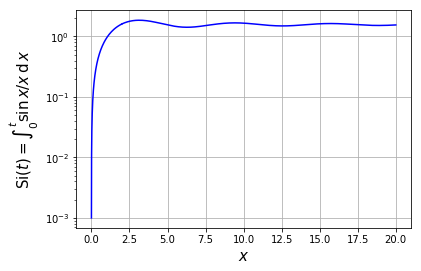

In [33]:
t=np.logspace(np.log10(1E-3),np.log10(2),200)
tt=np.linspace(2,20,200)
plt.semilogy(t,Si(t),'b-')
plt.semilogy(tt,Si(tt),'b-')
plt.xlabel('$x$',size=15)
plt.ylabel(r'${\rm Si}(t)=\int_0^t {\sin\, x}/{x}\,{\rm d}\,x$',size=15)
plt.grid()

## Numerical quadrature

Given a well-behaved function $f(x)$, a previous theorem guarantees that

$$f(x) = \sum_{k=0}^n f(x_k)L_{n,k}(x) + \frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi(x))$$

with $L_{n,k}(x)$ the lagrange basis functions. Integrating $f(x)$ over $[a,b]$, we obtain the next expression:

$$\int_a^b f(x)dx = \int_a^b\sum_{k=0}^n f(x_k)L_{n,k}(x)dx + \int_a^b\frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi(x))dx$$

It is worth mentioning this expression is a number, unlike differentiation where we obtained a function.

We can readily convert this expression in a weighted summation as

$$\int_a^b f(x)dx = \sum_{k=0}^n a_if(x_k) + \frac{1}{(n+1)!}\int_a^bf^{(n+1)}(\xi(x)) \prod_{k=0}^{n}(x-x_k)dx$$

where each coefficient is defined as:

$$a_i = \int_a^b L_{n,k}(x) dx = \int_a^b\prod_{j=0,\ j\neq k}^{n}\frac{(x-x_j)}{(x_k-x_j)}dx$$

Finally, the quadrature formula or **Newton-Cotes formula** is given by the next expression:

$$\int_a^b f(x) dx = \sum a_i f(x_i) + E[f]$$

where the estimated error is 

$$E[f] = \frac{1}{(n+1)!}\int_a^bf^{(n+1)}(\xi(x)) \prod_{k=0}^{n}(x-x_k)dx $$

Asumming besides intervals equally spaced such that $x_i = x_0 + i\times h$, the error formula becomes:

$$E[f] = \frac{h^{n+3}f^{n+2}(\xi)}{(n+1)!}\int_0^nt^2(t-1)\cdots(t-n) $$

if $n$ is even and

$$E[f] = \frac{h^{n+2}f^{n+1}(\xi)}{(n+1)!}\int_0^nt(t-1)\cdots(t-n) $$

if $n$ is odd.

In [14]:
#Quadrature method
def Quadrature( f, X, xmin, xmax, ymin=0, ymax=1, fig=None, leg=True ):
    #f(x_i) values
    Y = f( X )
    
    #X array
    Xarray = np.linspace( xmin, xmax, 1000 )
    #X area
    Xarea = np.linspace( X[0], X[-1], 1000 )
    #F array
    Yarray = f( Xarray )
    
    #Lagrange polynomial
    Ln = interp.lagrange( X, Y )
    #Interpolated array
    Parray = Ln( Xarray )
    #Interpolated array for area
    Parea = Ln( Xarea )
    
    #Plotting
    if fig==None:
        fig = plt.figure( figsize = (8,8) )
    ax = fig.add_subplot(111)
    #Function
    ax.plot( Xarray, Yarray, linewidth = 3, color = "blue", label="$f(x)$" )
    #Points
    ax.plot( X, Y, "o", color="red", label="points", zorder = 10 )
    #Interpolator
    ax.plot( Xarray, Parray, linewidth = 2, color = "black", label="$P_{%d}(x)$"%(len(X)-1) )
    #Area
    ax.fill_between( Xarea, Parea, color="green", alpha=0.5 )
    
    #Format
    ax.set_title( "%d-point Quadrature"%(len(X)), fontsize=16 )
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (0, 4) )
    ax.set_xlabel( "$x$" )
    ax.set_ylabel( "$y$" )
    if leg:
        ax.legend( loc="upper left", fontsize=16 )
    ax.grid(1)
    
    return ax

## Trapezoidal rule

Using the previous formula, it is easily to derivate a set of low-order approximations for integration. Asumming a function $f(x)$ and an interval $[x_0,x_1]$, the associated quadrature formula is that obtained from a first-order Lagrange polynomial $P_1(x)$ given by:

$$P_1(x) = \frac{(x-x_1)}{x_0-x_1}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)$$

Using this, it is readible to obtain the integrate:

$$\int_{x_0}^{x_1}f(x)dx = \frac{h}{2}[ f(x_0) + f(x_1) ]-\frac{h^3}{12}f^{''}(\xi)$$

with $\xi \in [x_0, x_1]$ and $h = x_1-x_0$.

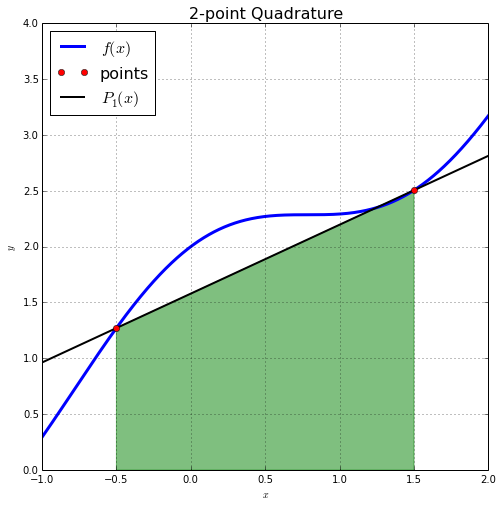

In [15]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 2 points (Trapezoidal rule)
X = np.array([-0.5,1.5])
Quadrature( f, X, xmin=-1, xmax=2, ymin=0, ymax=4 )

## Simpson's rule

A slightly better approximation to integration is the Simpson's rule. For this, assume a function $f(x)$ and an interval $[x_0,x_2]$, with a intermediate point $x_1$. The associate second-order Lagrange polynomial is given by:

$$P_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)$$

The final expression is then:

$$\int_{x_0}^{x_2} f(x)dx = \frac{h}{3}[ f(x_0)+4f(x_1)+f(x_2) ]-\frac{h^5}{90}f^{(4)}(\xi)$$

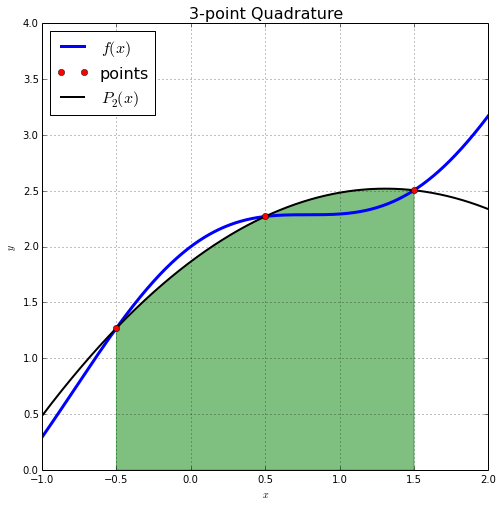

In [184]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 3 points (Simpson's rule)
X = np.array([-0.5,0.5,1.5])
Quadrature( f, X, xmin=-1, xmax=2, ymin=0, ymax=4 )

## <font color='red'>     **Activity** </font>

<font color='red'>   
- Using the trapezoidal and the Simpson's rules, determine the value of the integral (4.24565)

$$ \int_{-0.5}^{1.5}(1+\cos^2x + x)dx $$

- Take the previous routine Quadrature and the above function and explore high-order quadratures. What happends when you increase  the number of points?

## <font color='red'>     **Activity** </font>

<font color='red'>  

Approximate the following integrals using formulas Trapezoidal and Simpson rules. Are the accuracies of
the approximations consistent with the error formulas? 

\begin{eqnarray*}
&\int_{0}^{0.1}&\sqrt{1+ x}dx \\
&\int_{0}^{\pi/2}&(\sin x)^2dx\\ 
&\int_{1.1}^{1.5}&e^xdx 
\end{eqnarray*}

# Composite Numerical Integration

Although above-described methods are good enough when we want to integrate along small intervals, larger intervals would require more sampling points, where the resulting Lagrange interpolant will be a high-order polynomial. These interpolant polynomials exihibit usually an oscillatory behaviour (best known as [Runge's phenomenon](http://en.wikipedia.org/wiki/Runge%27s_phenomenon)), being more inaccurate as we increase $n$.

An elegant and computationally inexpensive solution to this problem is a *piecewise* approach, where low-order Newton-Cotes formula (like trapezoidal and Simpson's rules) are applied over subdivided intervals.

In [16]:
#Composite Quadrature method
def CompositeQuadrature( f, a, b, N, n, xmin, xmax, ymin=0, ymax=1 ):
    #X array
    X = np.linspace( a, b, N )
    
    #Plotting
    fig = plt.figure( figsize = (8,8) )
    for i in xrange(0,N-n,n):
        Xi = X[i:i+n+1]
        ax = Quadrature( f, Xi, X[i], X[i+n], fig=fig, leg=False )
    
    #X array
    Xarray = np.linspace( xmin, xmax, 1000 )
    #F array
    Yarray = f( Xarray )
    #Function
    ax.plot( Xarray, Yarray, linewidth = 3, color = "blue", label="$f(x)$", zorder=0 )
    
    #Format
    plt.xlim( (xmin, xmax) )
    plt.ylim( (ymin, ymax) )
    
    return None

## Composite trapezoidal rule

This formula is obtained when we subdivide the integration interval $[a,b]$ within sets of two points, such that we can apply the previous Trapezoidal rule to each one.

Let $f(x)$ be a well behaved function ($f\in C^2[a,b]$), defining the interval space as $h = (b-a)/N$, where N is the number of intervals we take, the **Composite Trapezoidal rule** is given by:

$$ \int_a^b f(x) dx = \frac{h}{2}\left[ f(a) + 2\sum_{j=1}^{N-1}f(x_j) + f(b) \right] - \frac{b-a}{12}h^2 f^{''}(\mu)$$

for some value $\mu$ in $(a,b)$.

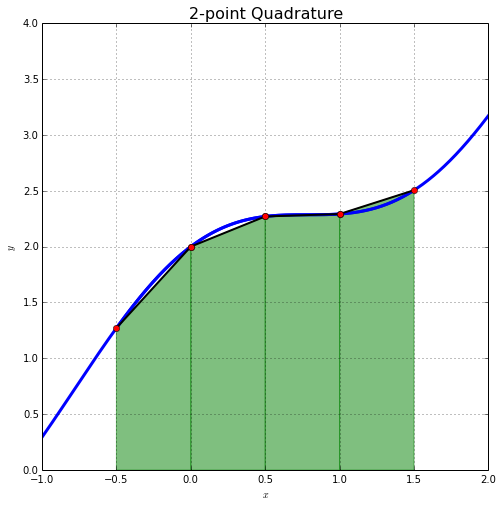

In [17]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 3 points (Simpson's rule)
CompositeQuadrature( f, a=-0.5, b=1.5, N=5, n=1, xmin=-1, xmax=2, ymin=0, ymax=4 )

## Composite Simpson's rule

Now, if we instead divide the integration interval in sets of three points, we can apply Simpson's rule to each one, obtaining:

$$ \int_a^bf(x)dx = \frac{h}{3}\left[ f(a) +2 \sum_{j=1}^{(n/2)-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(b) \right] - \frac{b-a}{180}h^4f^{(4)}(\mu)$$

for some value $\mu$ in $(a,b)$.

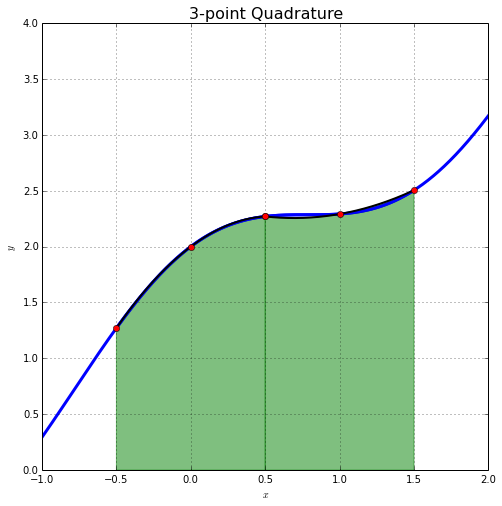

In [186]:
#Function
def f(x):
    return 1+np.cos(x)**2+x

#Quadrature with 3 points (Simpson's rule)
CompositeQuadrature( f, a=-0.5, b=1.5, N=5, n=2, xmin=-1, xmax=2, ymin=0, ymax=4 )

## <font color='red'>     **Activity** </font>

<font color='red'>   
- Using the Composite trapezoidal and Simpson's rules, determine the value of the integral (4.24565)

$$ \int_{-0.5}^{1.5}(1+\cos^2x + x)dx $$

- Take the previous routine CompositeQuadrature and the above function and explore high-order composites quadratures. What happens when you increase the number of points?
</font>

## <font color='red'>     **Activity** </font>

<font color='red'>    

An experiment has measured $dN(t)/dt$, the number of particles entering a counter, per unit time, as a function of time. Your problem is to integrate this spectrum to obtain the number of particles $N(1)$ that entered the counter
in the first second

$$ N(1) = \int_0^1 \frac{dN}{dt} dt$$

For the problem it is assumed exponential decay so that there actually is an analytic answer. 

$$ \frac{dN}{dt} = e^{-t} $$

Compare the relative error for the composite trapezoid and Simpson rules. Try different values of N. Make a logarithmic plot of N vs Error.

- - -

# Adaptive Quadrature Methods

Calculating the integrate of the function $f(x) = e^{-3x}\sin(4x)$ within the interval $[0,4]$, we obtain:

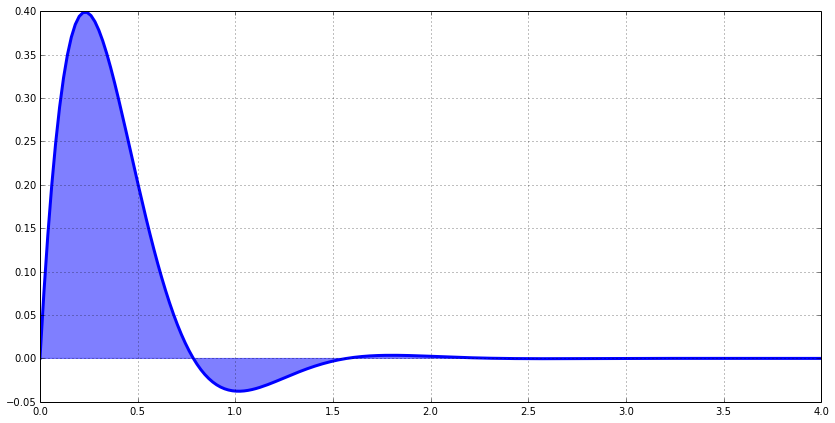

In [13]:
#Function
def f(x):
    return np.exp(-3*x)*np.sin(4*x)

#Plotting
X = np.linspace( 0, 4, 200 )
Y = f(X)
plt.figure( figsize=(14,7) )
plt.plot( X, Y, color="blue", lw=3 )
plt.fill_between( X, Y, color="blue", alpha=0.5 )
plt.xlim( 0,4 )
plt.grid()

Using composite numerical integration is not completely adequate for this problem as the function exhibits different behaviours for differente intervals. For the interval $[0,2]$ the function varies noticeably, requiring a rather small integration interval $h$. However, for the interval $[2,4]$ variations are not considerable and low-order composite integration is enough. This lays a pathological situation where simple composite methods are not efficient. In order to remedy this, we introduce an adaptive quadrature methods, where the integration step $h$ can vary according to the interval. The main advantage of this is a controlable precision of the result.

## Simpson's adaptive quadrature

Although adaptive quadrature can be readily applied to any quadrature method, we shall cover only the Simpson's adaptive quadrature as it is more than enough for most problems.

Let's assume a function $f(x)$. We want to compute the integral within the interval $[a,b]$. Using a simple Simpson's quadrature, we obtain:

$$\int_a^bf(x)dx = S(a,b) - \frac{h^5}{90}f^{(4)}(\xi)$$

where we introduce the notation:

$$S(a,b) = \frac{h}{3}\left[ f(a) + 4f(a+h) + f(b) \right]$$

and $h$ is simply $h = (b-a)/2$.

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/bb0f137366b3d2bbfdd33425ad78be4003716703/material/figures/adaptive_quadrature.png)

Now, instead of using an unique Simpson's quadrature, we implement two, yielding:

$$\int_a^bf(x)dx = S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16}\left(\frac{h^5}{90}\right)f^{(4)}(\xi)$$

For this expression, we reasonably assume an equal fourth-order derivative $f^{(4)}(\xi) = f^{(4)}(\xi_1) = f^{(4)}(\xi_2) $, where $\xi_1$ is the estimative for the first subtinterval (i.e. $\xi_1\in[a,(a+b)/2]$), and $\xi_2$ for the second one (i.e. $\xi_1\in[(a+b)/2, b]$).

As both expressions can approximate the real value of the integrate, we can equal them, obtaining:

$$\int_a^bf(x)dx = S(a,b) - \frac{h^5}{90}f^{(4)}(\xi) = S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) - \frac{1}{16}\left(\frac{h^5}{90}\right)f^{(4)}(\xi)$$

which leads us to a simple way to estimate the error without knowing the fourth-order derivative, i.e.

$$\frac{h^5}{90}f^{(4)}(\xi) = \frac{16}{15}\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|$$

If we fix a precision $\epsilon$, such that the obtained error for the second iteration is smaller

$$\frac{1}{16}\frac{h^5}{90}f^{(4)}(\xi) < \epsilon $$

it implies:

$$\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|< 15 \epsilon$$

and 

$$\left| \int_a^bf(x) dx- S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|< \epsilon$$

The second iteration is then $15$ times more precise than the first one.

## Steps Simpson's adaptive quadrature

**1.** Give the function $f(x)$ to be integrated, the inverval $[a,b]$ and set a desired precision $\epsilon$.

**2.** Compute the next Simpsons's quadratures:

$$ S(a,b),\ S\left(a,\frac{a+b}{2}\right),\ S\left(\frac{a+b}{2},b\right) $$

**3.** If 

$$\frac{1}{15}\left| S(a,b) - S\left(a,\frac{a+b}{2}\right) - S\left(\frac{a+b}{2},b\right) \right|<\epsilon$$

then the integration is ready and is given by:

$$\int_a^bf(x) dx \approx S\left(a,\frac{a+b}{2}\right) + S\left(\frac{a+b}{2},b\right) $$

within the given precision.

**4.** If the previous step is not fulfilled, repeat from step **2** using as new intervals $[a,(a+b)/2]$ and $[(a+b)/2,b]$ and a new precision $\epsilon_1 = \epsilon/2$. Repeating until step 3 is fulfilled for all the subintervals.

## <font color='red'>     **Activity** </font>

###Models of Universe

From the Friedmann equations can be found the dynamics of the Universe, i.e., the evolution of the expansion with time that depends on the content of matter and energy of the Universe. Before introducing the general expression, there are several quatities that need to be defined. 

It is convenient to express the density in terms of a critical density $\rho_c$ given by

\begin{equation}
\rho_c = 3H_0^2/8\pi G
\end{equation}

where $H_o$ is the Hubble constant. The critical density is the density needed in order the Universe to be flat. To obtained it, it is neccesary to make the curvature of the universe $\kappa = 0$. The critical density is one value per
time and the geometry of the universe depends on this value, or equally on $\kappa$. For a universe with $\kappa<0$ it would ocurre a big crunch(closed universe) and for a $\kappa>0$ there would be an open universe.    

Now, it can also be defined a density parameter, $\Omega$, a normalized density

\begin{equation}
\Omega_{i,0} = \rho_{i,0}/\rho_{crit}
\end{equation}

where $\rho_{i,0}$ is the actual density($z=0$) for the component $i$. Then, it can be found the next expression 

\begin{equation}
\frac{H^2(t)}{H_{0}^{2}} = (1-\Omega_0)(1+z)^2 + \Omega_{m,0}(1+z^3)+ \Omega_{r,0}(1+z)^4 + \Omega_{\Lambda,0}
\end{equation}

where $\Omega_{m,0}$, $\Omega_{r,0}$ and  $\Omega_{\Lambda,0}$ are the matter, radiation and vacuum density parameters. And $\Omega_0$ is the total density including the vacuum energy. 

This expression can also be written in terms of the expansion or scale factor($a$) rather than the redshift($z$) due to the expression $1+z = 1/a$ and it can be simplified in several ways. 

For the next universe models, plot time($H_{0}^{-1}$ units) vs the scale factor:

-Einstein-de Sitter Universe: Flat space, null vacuum energy and dominated by matter

\begin{equation}
t = H_0^{-1} \int_0^{a'} a^{1/2}da
\end{equation}
 
-Radiation dominated universe: All other components are not contributing 

$$
t = H_0^{-1} \int_0^{a'} \frac{a}{[\Omega_{r,0}+a^2(1-\Omega_{r,0})]^{1/2}}da
$$

-WMAP9 Universe 

\begin{equation}
t = H_0^{-1} \int_0^{a'} \left[(1-\Omega_{0})+ \Omega_{m,0}a^{-1} + \Omega_{r,0}a^{-2} +\Omega_{\Lambda,0}a^2\right]^{-1/2} da
\end{equation}


You can take the cosmological parameters  from the link 

http://lambda.gsfc.nasa.gov/product/map/dr5/params/lcdm_wmap9.cfm or use these ones: $\Omega_M$ = 0.266,
$\Omega_R = 8.24e-5$ and $\Omega_L = 0.734$. 

Use composite simpson rule to integrate and compare it with the analitical expression in case you can get it. 
The superior limit in the integral corresponds to the actual redshift $z=0$. What is happening to our universe? 



## <font color='red'>     **Activity** </font>

<font color='red'>   
- Using the Simpson's adaptive quadrature determine the value of the next integral with a precision of float32.

$$\int_0^4 e^{-3x}\sin(4x)dx$$


## <font color='red'>     **Activity** </font>

<font color='red'>   
Fresnel integrals are commonly used in the study of light difraction at a rectangular aperture, they are given by:

$$c(t) = \int_0^t\cos\left(\frac{\pi}{2}\omega^2\right)d\omega$$

$$s(t) = \int_0^t\sin\left(\frac{\pi}{2}\omega^2\right)d\omega$$

These integrals cannot be solved using analitical methods. Using the previous routine for adaptive quadrature, compute the integrals with a precision of $\epsilon=10^{-4}$ for values of $t=0.1,0.2,0.3,\cdots 1.0$. Create two arrays with those values and then make a plot of $c(t)$ vs $s(t)$. The resulting figure is called Euler spiral, that is a member of a family of curves called [Clothoid loops](http://en.wikipedia.org/wiki/Vertical_loop).


- - -

# Improper Integrals

Although the previous integration methods can be applied in almost every situation, improper integrals pose a challenger to numerical methods as they involve indeterminations and infinite intervals. Next, we shall cover some tricks to rewrite improper integrals in terms of simple ones.

## Left endpoint singularity

Assuming a function $f(x)$ such that it can be rewritten as

$$ f(x) = \frac{g(x)}{(x-a)^p} $$

the integral over an interval $[a,b]$ converges only and only if $0<p<1$.

Using Simpson's composite rule, it is possible to compute the fourth-order Taylor polynomial of the function $g(x)$ at the point $a$, obtaining

$$ P_4(x) = g(a) + g^{'}(a)(x-a)+\frac{g^{''}(a)}{2!}(x-a)^2 +\frac{g^{''}(a)}{3!}(x-a)^3+ \frac{g^{(4)}(a)}{4!}(x-a)^4$$

The integral can be then calculated as

$$\int_a^b f(x)dx = \int_a^b\frac{g(x)-P_4(x)}{(x-a)^p}dx + \int_a^b\frac{P_4(x)}{(x-a)^p}dx$$

The second term is an integral of a polynimal, which can be easily integrated using analytical methods.

The first term is no longer pathologic as there is not any indetermination, and it can be determined using composite Simpson's rule

## Right endpoint singularity

This is the contrary case, where the indetermination is present in the extreme $b$ of the integration interval $[a,b]$. For this problem is enough to make a variable substitution

$$ z=-x \  \ \ \ \ \  dz=-dx$$

With this, the right endpoint singularity becomes a left endpoint singularity and the previous method can be directly applied.

## Infinite singularity

Finally, infinite singularities are those where the integration domain is infinite, i.e.

$$\int_a^\infty f(x)dx$$

this type of integrals can be easily turned into a left endpoint singularity jus making the next variable substitution

$$t = x^{-1}\ \ \ \ \ dt = -x^{-2}dx$$

yielding

$$ \int_a^\infty f(x)dx = \int_0^{1/a}t^{-2}f\left(\frac{1}{t}\right)dt $$

## <font color='red'>     **Activity** </font>

<font color='red'>   
Error function is a special and non-elementary function that is widely used in probability, statistics and diffussion processes.
It is defined through the integral:

$$\mbox{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}dt$$

Using the substitution $u=t^2$ it is possible to use the previous methods for impropers integrals in order to evaluate the error function. Create a routine called `ErrorFunction` that, given a value of $x$, return the respective value of the integral.


- - -